Notebook to try and assess the tightness of focus of a beam and the power after focusing.

This uses pre-processed files in `processed_data`.

The reason for rotating is to make it easy to normalise.

In [1]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Investigating Maximum Power

In [3]:
#angle = 30

#path = '../raw_data/0222_focus_'
#wrap  = np.array(sio.loadmat(path + 'wrap_' + str(angle) + '.mat')['data']['p'][0][0])
#unwrap = np.array(sio.loadmat(path + str(angle) + '.mat')['data']['p'][0][0])

In [53]:
# Grid parameters
N = 256         # Number of grid points
size = 50e-3    # [m]
dx = size/N
x_offset = 20

# Steering parameters
r = 20e-3       # steering radius [m]

# Plot parameters and variables
plt.set_cmap('RdBu')
x = np.linspace(-1, 1, N + 1) * size/2
y = x 
X, Y = np.meshgrid(x, y)

def power_plot(wrap, unwrap):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    max = np.max(unwrap)
    quad0 = ax[0].pcolormesh(X, Y, np.max(wrap, axis=2), vmin = 0, vmax = max)
    quad1 = ax[1].pcolormesh(X, Y, np.max(unwrap, axis=2), vmin = 0, vmax = max)

    ax[0].set_title('wrapped')
    ax[1].set_title('unwrapped')

    return fig, ax, quad0, quad1

<Figure size 432x288 with 0 Axes>

The distance to the focus is `r` from the transducer. Also the transducer is `x_offset` gridpoints away from the simulation boundary. 

Therefore the location of the focus is at the gridpoint `r/dx + x_offset`.

In [ ]:
print(f'Location of focus: {r/dx + x_offset}')

### 0 degrees
Not steered, function satisfies inequality so we expect the same function

Text(0.5, 0.98, '0 degrees')

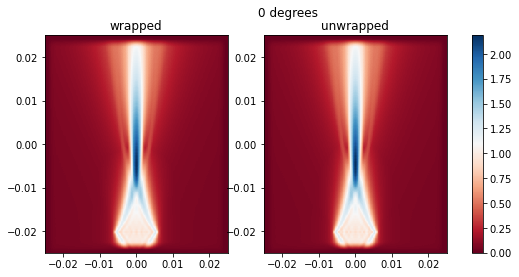

In [54]:
angle = 0 

wrap = np.load('../processed_data/0222_focus_wrap_0.npy')
unwrap = np.load('../processed_data/0222_focus_0.npy')

fig, ax, quad0, quad1 = power_plot(wrap[0], unwrap[0])
fig.colorbar(quad0, ax=ax)
fig.suptitle('0 degrees')

Text(0.5, 0.98, '10 degrees')

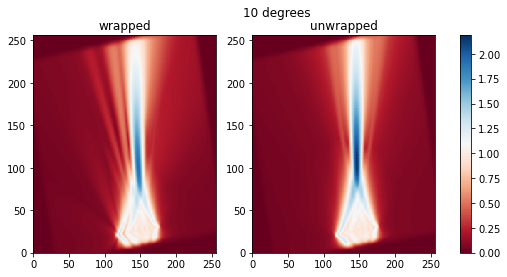

In [49]:
wrap = np.load('../processed_data/0222_focus_wrap_10.npy')
unwrap = np.load('../processed_data/0222_focus_10.npy')

fig, ax, quad0, quad1 = power_plot(wrap[0], unwrap[0])
fig.colorbar(quad0, ax=ax)
fig.suptitle('10 degrees')

Text(0.5, 0.98, '20 degrees')

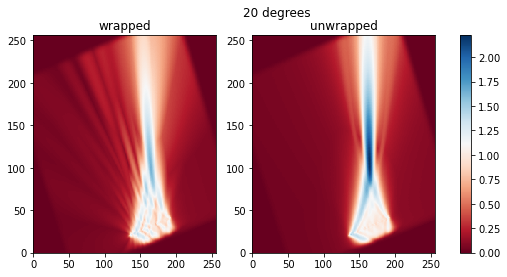

In [50]:
wrap = np.load('../processed_data/0222_focus_wrap_20.npy')
unwrap = np.load('../processed_data/0222_focus_20.npy')

fig, ax, quad0, quad1 = power_plot(wrap[0], unwrap[0])
fig.colorbar(quad0, ax=ax)
fig.suptitle('20 degrees')

Text(0.5, 0.98, '30 degrees')

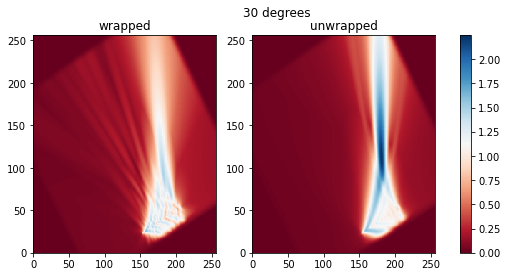

In [51]:
wrap = np.load('../processed_data/0222_focus_wrap_30.npy')
unwrap = np.load('../processed_data/0222_focus_30.npy')

fig, ax, quad0, quad1 = power_plot(wrap[0], unwrap[0])
fig.colorbar(quad0, ax=ax)
fig.suptitle('30 degrees')

In [6]:
w = rotate(unwrap, angle)
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
ind

(120, 186, 397)

In [7]:
w[ind[0], ind[1], ind[2]]

2.2535539608709065

Text(0.5, 1.0, 'axial variation')

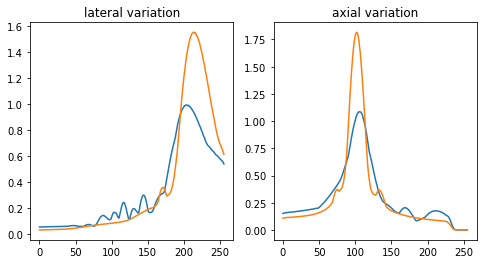

In [8]:
fig,ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(rotate(np.max(wrap, axis=2),angle, reshape=0)[ind[0],:])
ax[0].plot(rotate(np.max(unwrap, axis=2),angle, reshape=0)[ind[0], :])

ax[1].plot(rotate(np.max(wrap, axis=2),angle, reshape=0)[:,ind[1]])
ax[1].plot(rotate(np.max(unwrap, axis=2),angle, reshape=0)[:,ind[1]])

ax[0].set_title('lateral variation')
ax[1].set_title('axial variation')

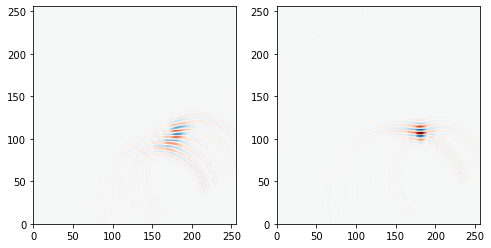

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
max = np.max(unwrap)

X, Y = np.meshgrid(range(size+1), range(size+1))
quad0 = ax[0].pcolormesh(X, Y, rotate(wrap[:,:,ind[2]], angle=-angle, reshape=0), vmin = -max, vmax = max)
quad1 = ax[1].pcolormesh(X, Y, rotate(unwrap[:,:,ind[2]], angle=-angle, reshape=0), vmin =-max, vmax= max)

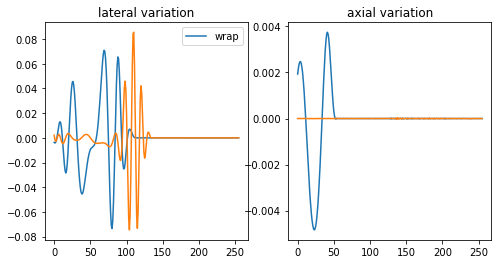

In [10]:
fig,ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(rotate(wrap[:,:,ind[2]],angle, reshape=0)[ind[0],:], label='wrap')
ax[0].plot(rotate(unwrap[:,:,ind[2]],angle, reshape=0)[ind[0], :])

ax[1].plot(rotate(wrap[:,:,ind[2]],angle, reshape=0)[:,ind[1]])
ax[1].plot(rotate(unwrap[:,:,ind[2]],angle, reshape=0)[:,ind[1]])

ax[0].set_title('lateral variation')
ax[1].set_title('axial variation')
ax[0].legend()

In [11]:
rotate(unwrap[:,:,ind[2]],angle, reshape=0)[ind[0], ind[1]]

-1.1964890448428865e-06

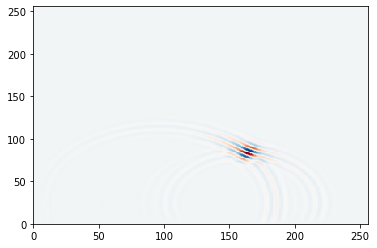

In [12]:
plt.pcolormesh(X,Y,unwrap[:,:,ind[2]])

# Sound Intensity/ power

In [95]:
def import_mat(path):
    data = sio.loadmat(path)['data'][0][0]
    data = np.array([data[0], data[1], data[2]])
    return data

def rotate_all(data, angle):
    return rotate(data, -angle, axes = (2,1), reshape=False)

name = '0222_focus_' + 'wrap_' + str(angle)
name = '0222_focus_' + str(angle)

fpath = '../raw_data/' + name + '.mat'
data = import_mat(fpath)

rotated = rotate(data, -angle, axes = (2,1), reshape=False)

with open('../processed_data/'+ name+'.npy', 'wb') as f:
    np.save(f, rotated)

In [96]:
rotated_wrap = np.load('../processed_data/0222_focus_wrap_30.npy')

Text(0.5, 1.0, 'unwrapped')

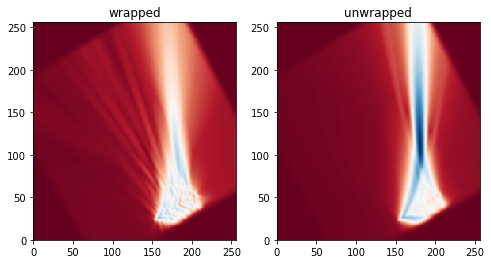

In [125]:
def calc_intensity(rotated, angle):
    return rotated[0]*(rotated[1]*np.cos(angle) + rotated[2]*np.sin(angle))

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

idx = 0

max = np.max(rotated[idx])
X, Y = np.meshgrid(range(size+1), range(size+1))
quad0 = ax[0].pcolormesh(X, Y, np.max(rotated_wrap[idx], axis=2), vmin = 0, vmax = max)
quad1 = ax[1].pcolormesh(X, Y, np.max(rotated[idx], axis=2), vmin = 0, vmax= max)

ax[0].set_title('wrapped')
ax[1].set_title('unwrapped')

In [112]:
intensity = calc_intensity(rotated, angle)
intensity_wrap = calc_intensity(rotated_wrap, angle)

Text(0.5, 1.0, 'unwrapped')

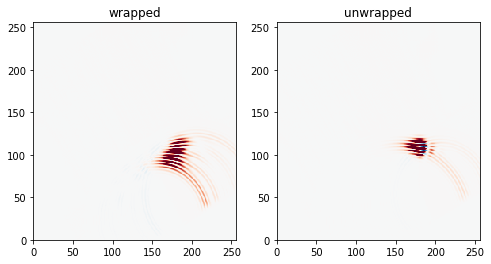

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

t = 400

max = np.max(intensity[:,:,t])
X, Y = np.meshgrid(range(size+1), range(size+1))

quad0 = ax[0].pcolormesh(X, Y, intensity_wrap[:,:,t], vmin = -max, vmax = max)
quad1 = ax[1].pcolormesh(X, Y, intensity[:,:,t], vmin = -max, vmax= max)

ax[0].set_title('wrapped')
ax[1].set_title('unwrapped')

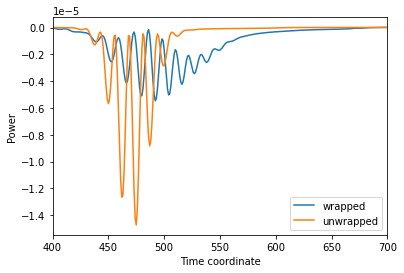

In [142]:
def calc_power(intensity, plane,):
    return np.sum(intensity[plane,:], axis=0)

x = 130


plt.plot(calc_power(intensity_wrap, x), label='wrapped')
plt.plot(calc_power(intensity, x), label='unwrapped')

plt.ylabel('Power')
plt.xlabel('Time coordinate')

plt.xlim(400, 700)
plt.legend()